In [15]:
import requests

# 从 token.txt 文件中读取 token
with open('../token.txt', 'r') as file:
    token = file.read().strip()

# 设置请求头中的 Authorization 标头
headers = {
    'Authorization': f'Bearer {token}'
}

url = 'http://localhost:1234/marketindex/momentum'

In [16]:
my_data = []

response = requests.get(url, headers=headers)

if response.status_code == 200:
    my_data = response.json()
    print('Response data:', my_data)  # 输出响应数据
else:
    print('Request failed with status code:', response.status_code)

Response data: [{'createdAt': '2024-03-27 04', 'volume': 1.14}, {'createdAt': '2024-03-27 06', 'volume': 1.15}, {'createdAt': '2024-03-27 07', 'volume': 1.02}, {'createdAt': '2024-03-27 08', 'volume': 1}, {'createdAt': '2024-03-27 09', 'volume': 1.1}, {'createdAt': '2024-03-28 02', 'volume': 0.89}, {'createdAt': '2024-03-28 03', 'volume': 0.91}, {'createdAt': '2024-03-28 04', 'volume': 1.01}, {'createdAt': '2024-03-28 06', 'volume': 1.11}, {'createdAt': '2024-03-28 08', 'volume': 1.17}, {'createdAt': '2024-03-28 09', 'volume': 1.16}, {'createdAt': '2024-03-29 02', 'volume': 1.19}, {'createdAt': '2024-03-29 03', 'volume': 1.15}, {'createdAt': '2024-03-29 04', 'volume': 1.12}, {'createdAt': '2024-03-29 06', 'volume': 1.15}, {'createdAt': '2024-03-29 07', 'volume': 1}, {'createdAt': '2024-03-29 08', 'volume': 1.04}, {'createdAt': '2024-03-29 09', 'volume': 0.98}, {'createdAt': '2024-03-29 10', 'volume': 1.05}, {'createdAt': '2024-04-01 02', 'volume': 1.25}, {'createdAt': '2024-04-01 03', 

In [3]:
import pandas as pd

df = pd.DataFrame(my_data)
df.to_excel('momentum_data.xlsx', index=False)

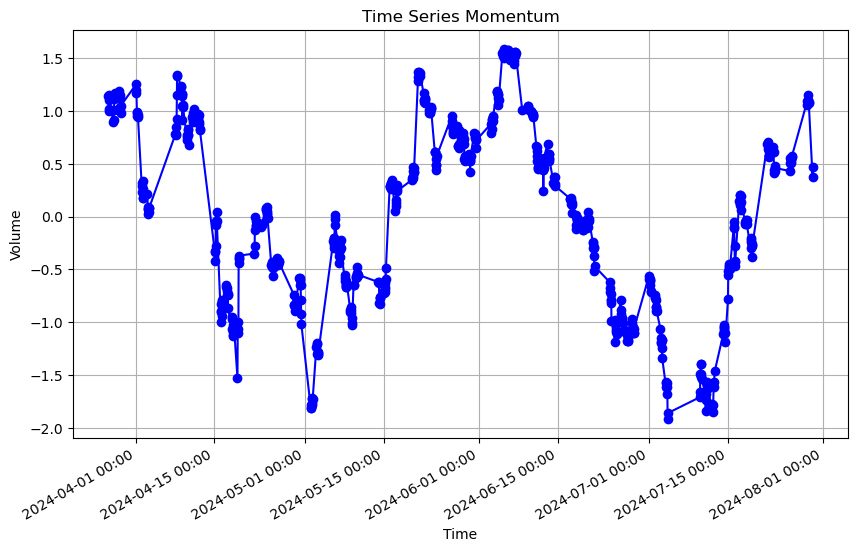

In [17]:

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# 将数据转换为 DataFrame
df = pd.DataFrame(my_data)

# 将 'createdAt' 列转换为日期时间对象
df['createdAt'] = pd.to_datetime(df['createdAt'])

# 绘制时间序列数据
plt.figure(figsize=(10, 6))
plt.plot(df['createdAt'], df['volume'], marker='o', linestyle='-', color='b')

# 格式化 x 轴的时间显示
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))

# 设置标题和标签
plt.title('Time Series Momentum')
plt.xlabel('Time')
plt.ylabel('Volume')

# 显示网格
plt.grid(True)

# 自动调整 x 轴日期标签显示
plt.gcf().autofmt_xdate()

# 显示图形
plt.show()